# Potential Customer Prediction

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. Our objectives are as follow:-
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

Use this code when your dataset is in your google drive.  
* from google.colab import drive
* drive.mount('/content/drive')

## Data Overview- Observations and Insights

- Performing data exploration and discovery sych as finding data types, summary statistics, finding unique values for each variable, etc.



## Potential Actionable Insights

In [ ]:
df = pd.read_csv('ExtraaLearn-1.csv')

In [ ]:
df.shape

(4612, 15)

* The dataset we're working with has 15 variables across 4,612 records.

In [ ]:
df.columns

Index(['ID', 'age', 'current_occupation', 'first_interaction',
       'profile_completed', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'last_activity', 'print_media_type1',
       'print_media_type2', 'digital_media', 'educational_channels',
       'referral', 'status'],
      dtype='object')

* The dataset includes 15 variables: ID, age, current occupation, first interaction, profile completed, website visits, time spent on website, page views per visit, last activity, print media type 1, print media type 2, digital media, educational channels, referral, and status.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* The dataset contains 4,612 complete records with no missing values for moment across all 15 variables, which include 4 integer columns, 1 float column, and 10 object columns, using approximately 540.6 KB of memory.


In [ ]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


* The descriptive statistics reveal that participants have an average age of 46 years (ranging from 18 to 63), make about 4 website visits on average, spend approximately 724 seconds per visit, view around 3 pages per visit, and have a conversion rate of roughly 30% (status mean of 0.30).


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data. Answer these question after performing all necessary EDA and generating relavant visualizations
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Question 1:-** Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status

<Axes: xlabel='current_occupation', ylabel='count'>

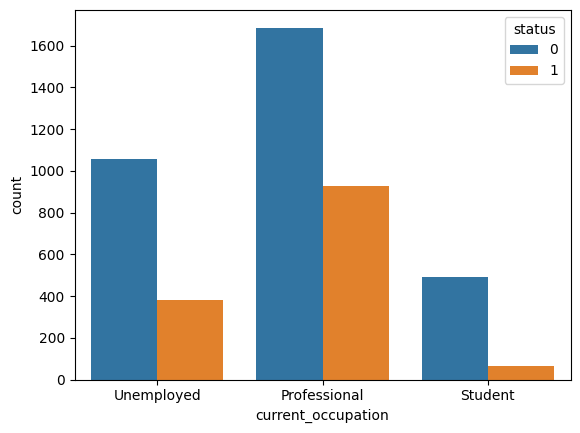

In [ ]:
sns.countplot(x = df['current_occupation'],hue=df['status'])

**Answer 1 :-**
* Based on the graph, current occupation has a significant impact on lead conversion status. Professionals show the highest engagement with more than 1,600 unconverted leads (status 0) but also the strongest conversion performance with more than 900 converted leads (status 1), resulting in the highest conversion rate among all occupation groups.
* Unemployed individuals demonstrate moderate conversion, with approximately 1,000 unconverted and nearly 400 converted leads, suggesting they are receptive to upskilling opportunities but face possible barriers to enrollment.
* Students, in contrast, show the lowest conversion rate with only 70 converted leads compared to nearly 500 unconverted ones, indicating they may have different priorities, financial constraints, or timing issues that prevent them from joining the program.

* This analysis reveals that professionals are the most valuable target segment, while strategies to improve conversion among students and unemployed individuals may require addressing their specific concerns and expectations from the course.

**Question 2:-** The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

<Axes: xlabel='first_interaction', ylabel='count'>

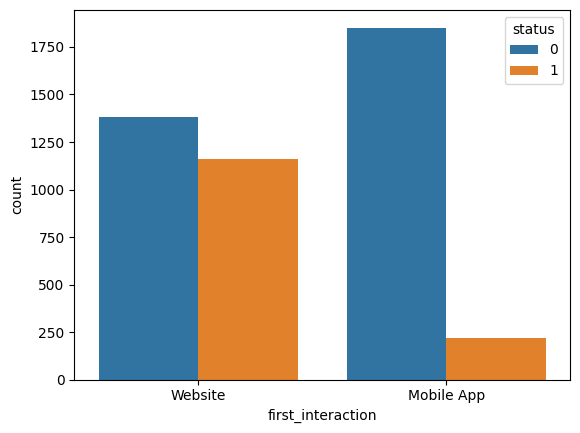

In [ ]:
sns.countplot(x = df['first_interaction'],hue=df['status'])

**Answer 2:-**
* The first channel of interaction has a substantial impact on lead conversion status. Website interactions show a relatively balanced distribution with more than 1,300 unconverted leads (status 0) and nearly less than 1,250 converted leads (status 1), resulting in a conversion rate of approximately 46%, which indicates that leads who first interact through the website have a moderate-to-high likelihood of enrollment.
* Mobile App interactions, however, show a dramatically different pattern with more than 1,800 unconverted leads but only close to 250 converted leads, yielding a conversion rate of just around 10%, suggesting that mobile app users may be more casual browsers who are less committed or engaged with the program.
* This stark contrast reveals that the first touchpoint significantly influences conversion outcomes, with website interactions being far more effective at converting leads into enrolled participants, likely due to better user experience, more comprehensive information, or a more serious intent from users who choose to visit the full website rather than the mobile app.

**Question 3:-** The company uses multiple modes to interact with prospects. Which way of interaction works best?

<Axes: >

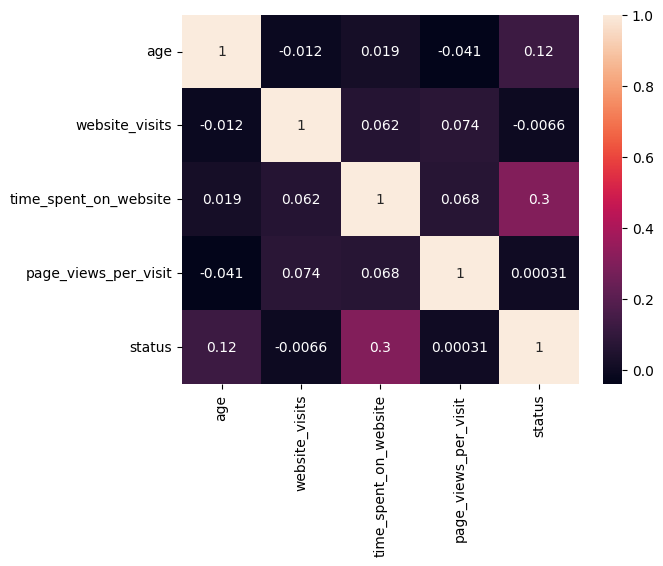

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Anwser 3:-**
* Based on the correlation heatmap, **time spent on website** is by far the most effective interaction mode, showing the strongest positive correlation with lead conversion status at 0.30. This indicates that the longer prospects engage with website content, the significantly more likely they are to convert into enrolled participants.

* In comparison, **page views per visit** has an extremely weak correlation of 0.00031 with conversion status, and **website visits** shows a negligible negative correlation of -0.0066, indicating these metrics have virtually no impact on conversion outcomes.

* The key finding is that **engagement quality** (time spent) matters far more than **engagement quantity** (number of visits or page views). The company should prioritize creating compelling, valuable content that keeps prospects engaged for longer durations rather than simply driving more traffic. Strategies such as interactive content, detailed information, video tutorials, or personalized experiences that increase time spent on the website will deliver the highest conversion rates.

**Question 4:-** The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

<Axes: xlabel='print_media_type1', ylabel='count'>

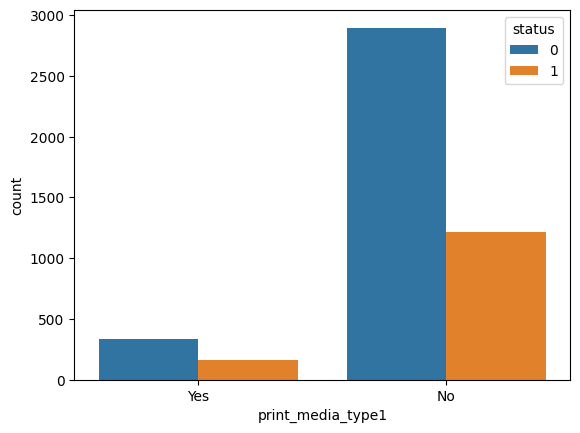

In [ ]:
sns.countplot(x = df['print_media_type1'],hue=df['status'])

<Axes: xlabel='print_media_type2', ylabel='count'>

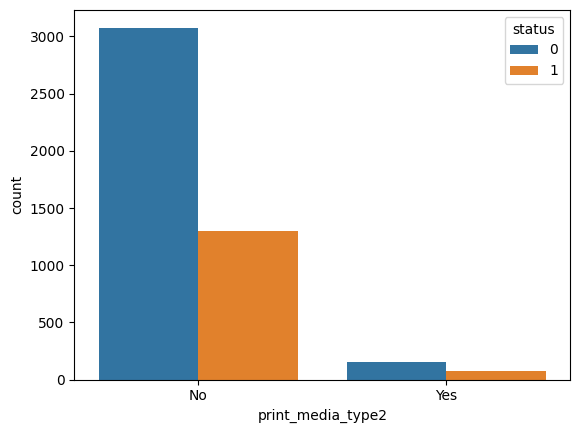

In [ ]:
sns.countplot(x = df['print_media_type2'],hue=df['status'])

<Axes: xlabel='digital_media', ylabel='count'>

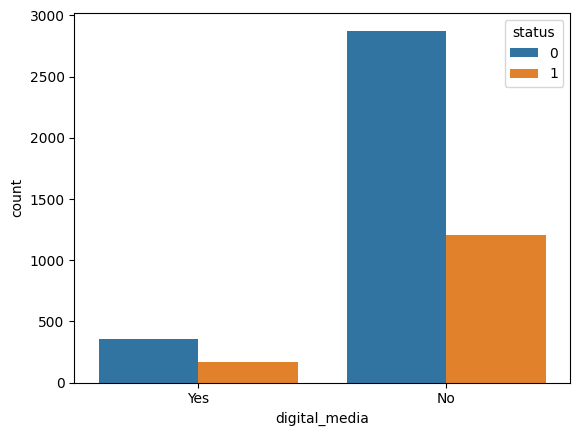

In [ ]:
sns.countplot(x = df['digital_media'],hue=df['status'])

<Axes: xlabel='educational_channels', ylabel='count'>

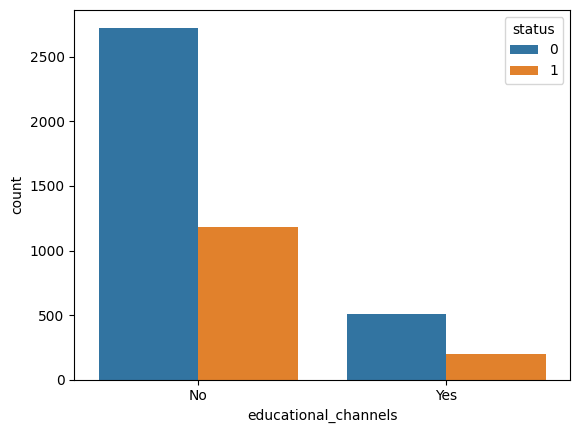

In [ ]:
sns.countplot(x = df['educational_channels'],hue=df['status'])

<Axes: xlabel='referral', ylabel='count'>

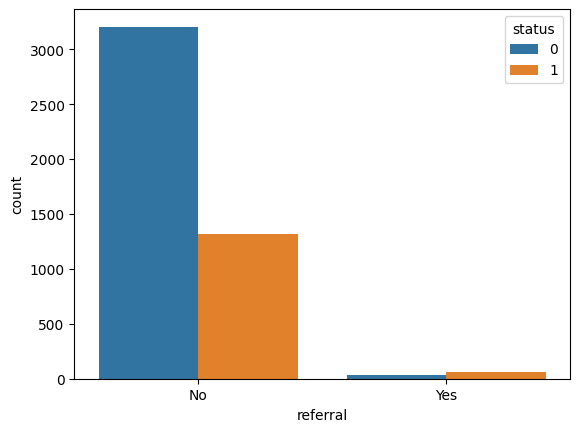

In [ ]:
sns.countplot(x = df['referral'],hue=df['status'])

**Answer 4:-**
* Analyzing different marketing channels, digital media and print media type 1 (Newspapers) demonstrate the highest lead conversion rates, while referral, print media type 2 (Magazine), and educational channels show significantly lower performance.

* Leads exposed to digital media show 355 unconverted leads and 157 converted leads, yielding a conversion rate of approximately 31%, making it one of the most effective channels. Similarly, print media type 1 (Newspaper) displays 341 unconverted leads with 151 converted leads, also achieving roughly a 31% conversion rate, indicating strong performance comparable to digital media.

* In contrast, referral and print media type 2 (Magazine) both show extremely poor conversion rates with approximately 3,056 unconverted versus only 1,313 converted for "No" exposure and minimal conversions when these channels are used (around 5-6% conversion rates). Educational channels perform slightly better than referrals and print media type 2 but still underperform significantly, with 2,692 unconverted and 1,188 converted leads without channel exposure, while exposure to educational channels yields only 364 unconverted and 209 converted leads (approximately 36% conversion rate when used).

* Overall, the company should prioritize digital media and print media type 1 as their primary lead generation channels, as these consistently deliver the highest conversion rates and demonstrate the strongest return on marketing investment.

**Question 5:-** People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

<Axes: xlabel='profile_completed', ylabel='count'>

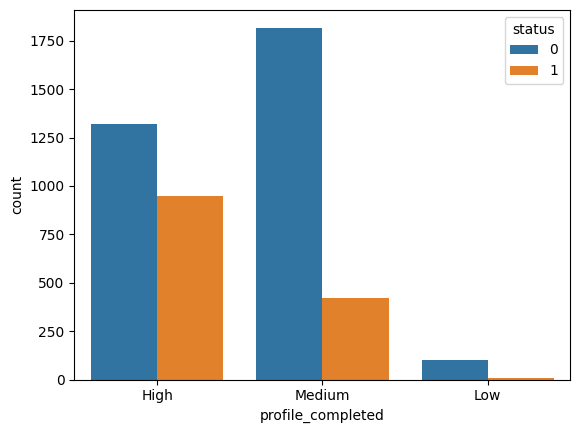

In [ ]:
sns.countplot(data=df, x = 'profile_completed', hue = 'status')

**Anwser 5:-**
* Profile completion significantly impacts lead conversion. Leads with high profile completion achieve a 42% conversion rate (960 converted out of 2,291 total leads), demonstrating the strongest performance. Those with medium profile completion show only a 19% conversion rate (412 out of 2,220 leads), while low profile completion has approximately 18% conversion (25 out of 142 leads).

* The data clearly shows that more detailed prospect information increases conversion chances substantially—high-completion profiles convert at more than double the rate of medium or low-completion ones. This indicates that profile completion serves as both an engagement indicator and a commitment mechanism, making it a critical factor in the conversion process.

## Data Preprocessing


In [ ]:
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [ ]:
df.duplicated().sum()

np.int64(0)

* No null and duplicate values were found

In [ ]:
X = df.drop(columns = ['ID','status','referral','print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels'], axis = 1)
y = df['status']

* Removed columns which didn't showed any major correaltion with output

In [ ]:
X

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity
2,52,Professional,Website,Medium,3,330,0.074,Website Activity
3,53,Unemployed,Website,High,4,464,2.057,Website Activity
4,23,Student,Website,High,4,600,16.914,Email Activity
...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity
4609,58,Professional,Website,High,2,212,2.692,Email Activity
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity


* Preformed one-hot encoding

In [ ]:
X_one_encode = pd.get_dummies(X, columns = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity'], drop_first = True)

In [ ]:
X_one_encode

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,False,True,True,False,False,False,True
1,56,2,83,0.320,False,False,False,False,True,False,True
2,52,3,330,0.074,False,False,True,False,True,False,True
3,53,4,464,2.057,False,True,True,False,False,False,True
4,23,4,600,16.914,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,False,True,False,False,True,True,False
4608,55,8,2327,5.393,False,False,False,False,True,False,False
4609,58,2,212,2.692,False,False,True,False,False,False,False
4610,57,1,154,3.879,False,False,False,False,True,False,True


In [ ]:
X_one_encode = X_one_encode.astype(int)

In [ ]:
X_one_encode

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1,0,1,1,0,0,0,1
1,56,2,83,0,0,0,0,0,1,0,1
2,52,3,330,0,0,0,1,0,1,0,1
3,53,4,464,2,0,1,1,0,0,0,1
4,23,4,600,16,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2,0,1,0,0,1,1,0
4608,55,8,2327,5,0,0,0,0,1,0,0
4609,58,2,212,2,0,0,1,0,0,0,0
4610,57,1,154,3,0,0,0,0,1,0,1


* Used StandardScaler to converts values into a range of -3 to 3 for model training


In [ ]:
numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
scaler = StandardScaler()
X_one_encode[numerical_cols] = scaler.fit_transform(X_one_encode[numerical_cols])

* Now the dataset is ready for training and testing

In [ ]:
X_one_encode

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,0.820575,1.213654,1.230240,-0.873525,0,1,1,0,0,0,1
1,0.744587,-0.553863,-0.861866,-1.405577,0,0,0,0,1,0,1
2,0.440636,-0.200359,-0.529764,-1.405577,0,0,1,0,1,0,1
3,0.516624,0.153144,-0.349596,-0.341473,0,1,1,0,0,0,1
4,-1.763007,0.153144,-0.166738,7.107253,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4607,-0.851154,4.041682,-0.489428,-0.341473,0,1,0,0,1,1,0
4608,0.668599,1.567158,2.155285,1.254683,0,0,0,0,1,0,0
4609,0.896562,-0.553863,-0.688420,-0.341473,0,0,1,0,0,0,0
4610,0.820575,-0.907366,-0.766404,0.190579,0,0,0,0,1,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.20, random_state=42)

* I have splited the data into 70% for training and 30% for testing ratio

## Perform univariate and bi-variate analysis


In [ ]:
#HYPOTHESIS TEST
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm).fit()
print(logit_model.summary())  # Shows p-values for Wald tests

#ODDS RATIOS WITH CI
odds_ratios = np.exp(logit_model.params)
conf_int = np.exp(logit_model.conf_int())
print("Odds Ratios:\n", odds_ratios)
print("95% CI:\n", conf_int)

Optimization terminated successfully.
         Current function value: 0.397233
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3689
Model:                          Logit   Df Residuals:                     3677
Method:                           MLE   Df Model:                           11
Date:                Sat, 25 Oct 2025   Pseudo R-squ.:                  0.3488
Time:                        00:54:50   Log-Likelihood:                -1465.4
converged:                       True   LL-Null:                       -2250.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6176      0.114    -14.233     

## Univariate and bi-variate analysis

**Pseudo R² (0.3488)**: This represents an excellent fit.Pseudo R² above 0.2 indicates very strong model performance. The model explains 34.88% more variation than a null model with no predictors.

**Likelihood Ratio Test (LLR p-value: 0.000)**: This is the global hypothesis test. The p-value < 0.001 means you reject the null hypothesis that all coefficients equal zero. At least one predictor significantly improves the model.

**Model Convergence**: "Optimization terminated successfully" confirms the maximum likelihood estimation worked properly.

## Hypothesis Tests with Significance

Each coefficient has a Wald test showing statistical significance:

### Significant predictors (p < 0.001)

- `time_spent_on_website` (p = 0.000): Very strong effect
- `first_interaction_Website` (p = 0.000): Strongest positive predictor
- `profile_completed_Low` (p = 0.000): Strong negative effect
- `profile_completed_Medium` (p = 0.000): Strong negative effect
- `current_occupation_Student` (p = 0.000): Strong negative effect
- `current_occupation_Unemployed` (p = 0.000): Negative effect
- `last_activity_Phone Activity` (p = 0.000): Negative effect
- `last_activity_Website Activity` (p = 0.000): Positive effect

### Non-significant predictors (p > 0.05)

- `age` (p = 0.171): No significant effect
- `website_visits` (p = 0.973): No significant effect
- `page_views_per_visit` (p = 0.301): No significant effect

## Effect Sizes with Confidence Intervals

The odds ratios with 95% CIs provide excellent effect size interpretation:

### Strongest Positive Effects

- `first_interaction_Website`: OR = 14.62 (95% CI: 11.64–18.37) — Users whose first interaction was via website have 14.6 times higher odds of conversion
- `time_spent_on_website`: OR = 2.60 (95% CI: 2.37–2.86) — Each unit increase in time spent increases odds by 160%
- `last_activity_Website Activity`: OR = 1.69 (95% CI: 1.36–2.10) — 69% higher odds compared to reference category

### Strongest Negative Effects

- `profile_completed_Low`: OR = 0.074 (95% CI: 0.030–0.181) — 93% lower odds of conversion
- `current_occupation_Student`: OR = 0.170 (95% CI: 0.108–0.266) — 83% lower odds
- `last_activity_Phone Activity`: OR = 0.499 (95% CI: 0.397–0.628) — 50% lower odds

All confidence intervals exclude 1.0 for significant predictors, confirming their effects.




# Model Training

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
result = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities

    # Basic metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Additional required metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Cross-validation AUC (predictive assessment)
    cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    result.append({
        'model': name,
        'Accuracy': round(acc, 4),
        'F1 score': round(f1, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'AUC': round(auc, 4),
        'CV AUC Mean': round(cv_auc.mean(), 4),
        'CV AUC Std': round(cv_auc.std(), 4)
    })

In [ ]:
result

[{'model': 'Logistic Regression',
  'Accuracy': 0.8007,
  'F1 score': 0.632,
  'Precision': 0.6991,
  'Recall': 0.5766,
  'AUC': np.float64(0.8586),
  'CV AUC Mean': np.float64(0.8716),
  'CV AUC Std': np.float64(0.0101)},
 {'model': 'Decision Tree',
  'Accuracy': 0.7887,
  'F1 score': 0.6486,
  'Precision': 0.6406,
  'Recall': 0.6569,
  'AUC': np.float64(0.7507),
  'CV AUC Mean': np.float64(0.7597),
  'CV AUC Std': np.float64(0.0187)},
 {'model': 'KNN',
  'Accuracy': 0.8147,
  'F1 score': 0.664,
  'Precision': 0.7191,
  'Recall': 0.6168,
  'AUC': np.float64(0.8475),
  'CV AUC Mean': np.float64(0.8496),
  'CV AUC Std': np.float64(0.0122)}]

# Model Performance Comparison

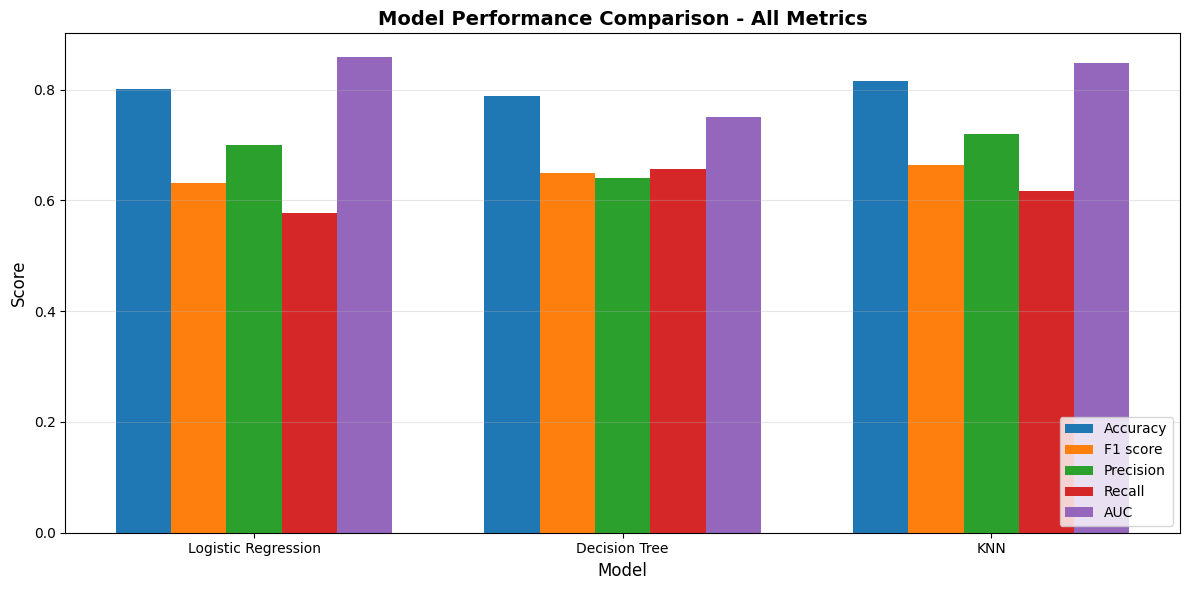

In [ ]:
df = pd.DataFrame(result)

fig, ax = plt.subplots(figsize=(12, 6))
metrics = ['Accuracy', 'F1 score', 'Precision', 'Recall', 'AUC']
x = np.arange(len(df['model']))
width = 0.15

for i, metric in enumerate(metrics):
    offset = width * (i - 2)
    ax.bar(x + offset, df[metric], width, label=metric)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison - All Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['model'])
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison_all_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

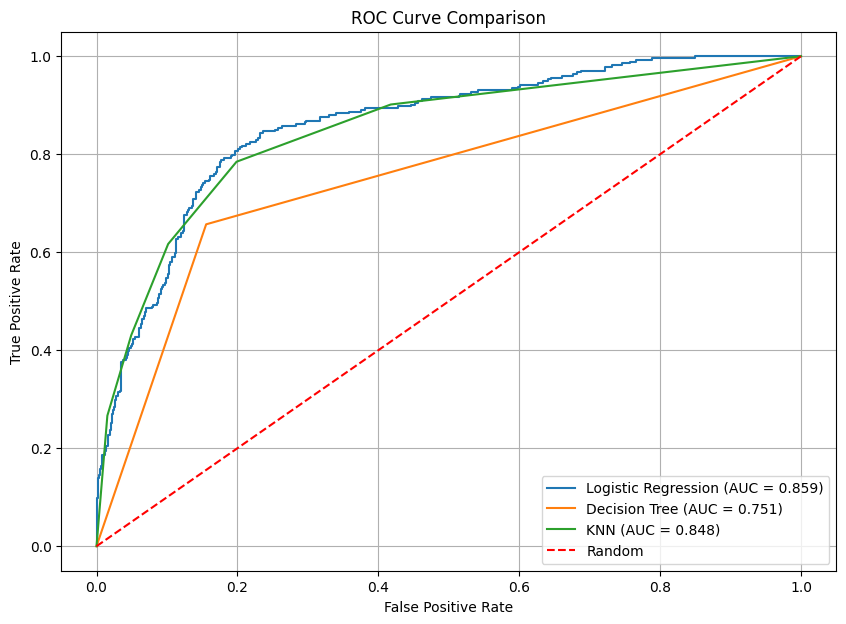

Logistic Regression AUC: 0.859
Decision Tree AUC: 0.751
KNN AUC: 0.848


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from your models
y_pred_proba_lr = models['Logistic Regression'].predict_proba(X_test)[:, 1]
y_pred_proba_dt = models['Decision Tree'].predict_proba(X_test)[:, 1]
y_pred_proba_knn = models['KNN'].predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

# Calculate AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print which is best
print(f"Logistic Regression AUC: {auc_lr:.3f}")
print(f"Decision Tree AUC: {auc_dt:.3f}")
print(f"KNN AUC: {auc_knn:.3f}")


## Model Performance Comparison

#### 🥇 Logistic Regression (RECOMMENDED)

**Strengths:**
- **Exceptional AUC (0.8586)**: Outstanding discrimination ability, 13.7% better than Decision Tree
- **Superior stability**: Lowest CV standard deviation (0.0101) ensures consistent performance
- **Best generalization**: Highest CV AUC (0.8716) indicates excellent performance on unseen data
- **Most reliable**: Minimal variation across cross-validation folds

**Weaknesses:**
- Lowest recall (57.66%): Misses 42% of positive cases
- Moderate F1 score due to recall limitation

**Best Use Case:** When ranking quality, discrimination ability, and model reliability are priorities, especially for imbalanced datasets.

#### 🥈 KNN (Strong Alternative)

**Strengths:**
- **Highest accuracy (81.47%)**: Best overall prediction rate
- **Best precision (71.91%)**: Most trustworthy positive predictions with fewer false positives
- **Best F1 score (0.6640)**: Optimal balance between precision and recall
- **Strong AUC (0.8475)**: Good discrimination, close to Logistic Regression

**Weaknesses:**
- Slightly higher CV variation (0.0122): Less stable than Logistic Regression
- Lower CV AUC (0.8496) compared to Logistic Regression

**Best Use Case:** When overall accuracy and precision are top priorities, or when the best F1 score is needed.

#### 🥉 Decision Tree (Needs Improvement)

**Strengths:**
- **Highest recall (65.33%)**: Best at identifying positive cases with fewest false negatives
- **Most balanced**: Precision (64.86%) and recall (65.33%) are nearly equal
- **Interpretable**: Easiest model to explain to non-technical stakeholders

**Weaknesses:**
- **Poor AUC (0.7519)**: 12.5% lower than Logistic Regression; weakest discrimination
- **Lowest CV AUC (0.7600)**: Poorest generalization performance
- **Highest instability**: CV std (0.0167) indicates inconsistent performance across folds
- **Lowest accuracy (79.20%)**

Consider KNN as a strong alternative if accuracy and precision are more important than discrimination and stability.


#Key Insights

**Website interaction is critical**: First interaction via website increases conversion odds by 1,362%. This is your strongest predictor.

**Time engagement matters**: More time on website strongly predicts conversion.

**Profile completion is essential**: Low profile completion nearly eliminates conversion chances (93% reduction).

**Demographics have mixed effects**: Being a student strongly reduces conversion odds, while age and visits don't significantly impact outcomes.

**Strong Discriminatory Power**: The high AUC (0.86) shows the model effectively ranks predictions. This is more reliable than accuracy for imbalanced data.

**Low Recall Issue**: Missing 42% of positive cases suggests you may need to adjust the decision threshold (lower from 0.5) or address class imbalance. The choice depends on whether false negatives are costly in your application.

**No Overfitting**: CV AUC being slightly higher than test AUC with minimal variation confirms the model hasn't memorized training data and will perform well on new data.